# [E-05] Rock Paper Scissors


<br>

< 목 차 >

###I.   서 론  

###II.  본 론  

1.   **데이터 준비**    

2.   **모델 구현 및 테스트**  

    1) *암흑 속을 헤매기 ㅡ*  

       - 1차 시도
       - 2차 시도
       - 3차 시도

    2) *등대를 찾아서 ㅡ*  

       - 4차 시도
       - 5차 시도

    3) *새로운 맘으로 다시 시작해 ㅡ*  

       - 6차 시도
       - 7차 시도

    4) *나도 여기까지 올 줄은 몰랐어 ㅡ*  

       - 8차 시도


3.   **종합 분석 및 검토**  

    1) 회차별 결과 종합  

    2) 주요 가설 재검증    

       - 이미지 사이즈 축소와 성능 간의 관계
       - 정규화 여부에 따른 성능 비교
       - 새로운 Model 적용 및 성능 비교


###III. 결 론  

<br><br><br>





---

# **I.  서 론**

<br>


####**[ 배경 및 의의 ]**

우리가 그림이나 사진을 보고 무엇을 나타내는지 직관적으로 알 수 있는 것과 달리, 기계가 이미지 분류에 성공하기까지는 어려움이 많았다고 한다. **합성곱 신경망(CNN)**은 데이터 상에서 유용한 특성만 도드라지게 하는 기법으로 이러한 이미지 인식분야에 획기적인 발전을 가져왔다. 

**CNN**의 **Convolution 연산**은 딥러닝 외에도 많이 사용되는 개념이다. 사진을 보정하는 필터 또한 Convolution 연산으로 이루어져 있다고 한다.[[1]](https://colab.research.google.com/drive/15pH35JfwxHXurPS4_6WqDiPGVXJyvdCm#scrollTo=VvtvwZRiR-eU&line=12&uniqifier=1) 이 기법은 이미지 데이터의 공간적 정보는 제대로 전달하면서도 연산의 효율성을 높일 수 있다. 

이번 Exploration에서는 **가위, 바위, 보 모양의 손 사진을 분류하는 딥러닝 모델**을 구현해본다. 이를 위해 실제로 사진을 촬영하는 것부터 네트워크를 설계하고 테스트하여 적정성능(정확도 60% 이상)을 달성하는 것까지 시도한다. 아직 심층 신경망(DNN)도 완벽히 섭렵하지 못했으므로 이번 기회에 합성곱 신경망과의 유사점 및 차이점을 통해 기본적인 딥러닝 네트워크 전반을 이해하고자 한다. 

<br>

####**[ 목표 ]**
*   심층 신경망과 합성곱 신경망에 대한 이해 
*   다량의 이미지 처리과정 익히기
*   이미지 분류를 위한 딥러닝 네트워크의 설계 및 활용법 숙지
*   전 과정에서의 문제점을 스스로 파악하고, 성능 개선방안을 구상할 수 있는 능력 배양
*   부족한 부분에 대한 인지 및 향후 보완사항 검토
*   (하다하다 잘 안돼도 멘탈붙잡기)


<br><br><br>




---

# **II. 본 론**




##**1. 데이터 준비**

<br><br>

학습에 쓰일 가위바위보 이미지는 해당 Exploration 수행을 위해 촬영된 사진만을 활용했다. Aiffel 참여자분들께서 공유해준 이미지를 포함했음을 밝힌다.(김경문 님, 이창환 님, 박범석 님, 전형진 님, 이오연 님, 서현 님, 김도현 님, 지정용 님 제공)


추가분은 teachable machine을 이용하여 직접 촬영했다. 

*   https://teachablemachine.withgoogle.com



<br>

필요한 라이브러리를 불러오자. 

이번 Exploration에서 주요하게 활용할 **Keras**는 딥러닝의 빠른 실험이 가능하도록 설계된 라이브러리다. Keras의 주 개발자인 구글의 엔지니어 Francois Chollet은 **최소한의 모듈 방식에 따른 확장 가능성**에 초점을 두고 이 라이브러리를 만들었다고 한다. 더불어 end-to-end 기계학습의 프레임워크가 아닌 **인터페이스의 역할**을 할 것을 기대했다고 한다. 이에, 보다 높은 수준의 더 직관적인 추상화 집합을 표현함으로써 **신경망을 쉽게 구성하는 데 도움**을 준다.[[2]](https://ko.wikipedia.org/wiki/%EC%BC%80%EB%9D%BC%EC%8A%A4)

In [ ]:
import tensorflow as tf
from tensorflow import keras    # 케라스

import numpy as np
from PIL import Image
import glob

<br><br>

준비한 이미지 데이터를 해당 특성(가위: 0, 바위: 1, 보: 2)에 맞춰 구분하고, 학습데이터(x_train) 및 label(y_train)을 나누어 지정한다.

**이미지 사이즈는 28*28로 축소**하여 이미지 처리 및 학습에 소요되는 과정을 경량화하였다. 또한 이번 단계에서 **RGB 구성범위(0-255)를 정규화(0-1)**하는 과정을 거쳤다. 

In [ ]:
''' 이미지 사이즈 변경 '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_r = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/rock'
resize_images(image_path_r)

image_path_p = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/paper'
resize_images(image_path_p)

image_path_s = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/scissor'
resize_images(image_path_s)

511  images to be resized.
511  images resized.
511  images to be resized.
511  images resized.
511  images to be resized.
511  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=1533):  # number_of_data = 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1533 입니다.
x_train shape: (1533, 28, 28, 3)
y_train shape: (1533,)


<br><br> 

이미지를 한 번 살펴보자.

아래와 같이 라벨별(가위: 0, 바위: 1, 보: 2)로 해당하는 손 이미지가 출력되었다. 이미지 사이즈 변환(28*28)에 의해 사진의 해상도는 낮아졌음을 알 수 있다.

- 라벨:  0


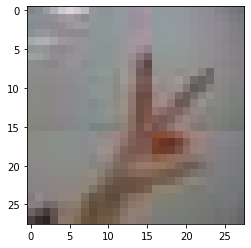

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[128])
print('- 라벨: ', y_train[128])

- 라벨:  1


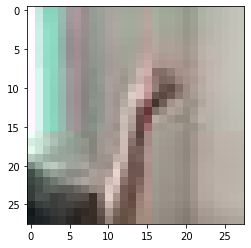

In [ ]:
plt.imshow(x_train[600])
print('- 라벨: ', y_train[600])

- 라벨:  2


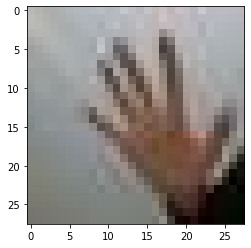

In [ ]:
plt.imshow(x_train[1205])
print('- 라벨: ', y_train[1205])

-

<br><br><br><br><br><br>




---




##**2. 모델 구현 및 테스트**

<br><br>

###**1) *암흑 속을 헤매기* ㅡ**



<br>

####**[ 1차 시도 ]**

<br>

**'1. 데이터 준비'**에서의 기초 셋팅을 토대로 가위바위보 분류를 실시하기 위한 딥러닝 네트워크를 설계하고, 학습 및 테스트를 수행해보자. 

이미지를 공유해주신 덕분에 각 label별로 500개 이상의 학습데이터를 마련할 수 있었고, 몇 차례 걸리지 않아 예측 정확도 목표를 달성할 수 있으리라고 예상했다. 

초기 모델은 Exploration에서 제시된 Layer를 별도의 수정없이 그대로 적용하는 것으로 셋팅한다. 총 9개의 Layer를 가지고 있으며, 최종적으로 3개의 Class를 분류하도록 설계하였다. 파라미터 역시 제시된 초기값을 먼저 그대로 적용한 뒤, 이후에 적정한 값을 조정해나가는 것으로 계획했다. 이때까지는 너무나 수월한 과정이 될 것으로 기대되었다. 이번 건 금방 제출하겠구나ㅡ 헛 꿈에 부푼 채 첫 번째 모델구현 및 첫 테스트를 실시했다.




**딥러닝 네트워크 설계**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))    # RGB Channel
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    # 최종 분류기의 Class수(3개: 가위(0),바위(1),보(2))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 64)        

<br><br>

**딥러닝 네트워크 학습**

compile은 다음과 같이 설정했다. 최적화를 위한 optimizer는 **Adam**을 사용하고, 손실함수는 **Sparse cross entropy**을 적용하였다. 

Adam(Adaptive Moment Estimation)은 Momentum과 RMSprop의 장점을 섞어놓은 것으로 딥러닝에서 가장 흔히 사용되는 최적화 알고리즘 중 하나다. sparse cross entropy는 멀티클래스 분류에 주로 활용되는 손실함수이며 label이 정수값일 때 적용한다.

epoch는 30으로 설정했다.

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1533, 28, 28, 3)
(1533,)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
48/48 [==============================] - 2s 20ms/step - loss: 4.0583 - accuracy: 0.3868
Epoch 2/30
48/48 [==============================] - 1s 20ms/step - loss: 1.0200 - accuracy: 0.4775
Epoch 3/30
48/48 [==============================] - 1s 20ms/step - loss: 0.9291 - accuracy: 0.5519
Epoch 4/30
48/48 [==============================] - 1s 20ms/step - loss: 0.8443 - accuracy: 0.6047
Epoch 5/30
48/48 [==============================] - 1s 20ms/step - loss: 0.7442 - accuracy: 0.6699
Epoch 6/30
48/48 [==============================] - 1s 20ms/step - loss: 0.6054 - accuracy: 0.7534
Epoch 7/30
48/48 [==============================] - 1s 20ms/step - loss: 0.4907 - accuracy: 0.8037
Epoch 8/30
48/48 [==============================] - 1s 20ms/step - loss: 0.4141 - accuracy: 0.8311
Epoch 9/30
48/48 [==============================] - 1s 20ms/step - loss: 0.3502 - accuracy: 0.8467
Epoch 10/30
48/48 [==============================] - 1s 20ms/step - loss: 0.3715 - accuracy: 0.8513
Epoch 11/

**테스트셋 구성**

학습 데이터와는 별도로 테스트데이터를 준비한다. label별로 각 100개씩, 총 300개의 데이터를 저장했다. 테스트데이터 상의 이미지는 앞에서 학습된 적 없는 전혀 다른 사람에 의해 새롭게 촬영된 것으로 준비했다.

In [ ]:
''' 이미지 사이즈 변경 '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 28x28 사이즈로 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_rr = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/test/rock'
resize_images(image_path_rr)

image_path_pp = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/test/paper'
resize_images(image_path_pp)

image_path_ss = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/test/scissor'
resize_images(image_path_ss)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # number_of_data=가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_tast)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_tast)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


<br><br>

**테스트 실시**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.1582 - accuracy: 0.4200 - 168ms/epoch - 17ms/step
test_loss: 3.158236503601074 
test_accuracy: 0.41999998688697815


<br>

정확도가 **41.9%**로 나왔다. 41.9%... **41.9%???**

기본 설정으로 돌린 값이 어느 정도는 나와야 Model Layer나 Hyper parameter를 조정하는 걸로 성능개선을 시도할텐데, 41.9%는 그런 부수적인 노력으로는 나아지기가 어렵다고 판단되는 수치다. 근본적인 문제가 있는 듯하다. 

일단 예측의 세부내용을 살펴보고, 문제의 원인을 유추해보도록 한다.

<br><br>

**예측 세부내용**

In [ ]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9984515e-01 8.4656014e-05 7.0198905e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [0.06262155 0.781642   0.15573649]
라벨: 0, 예측결과: 1


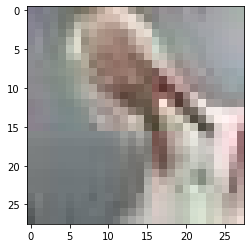

예측확률분포: [6.7066445e-08 9.9999988e-01 4.4979668e-08]
라벨: 2, 예측결과: 1


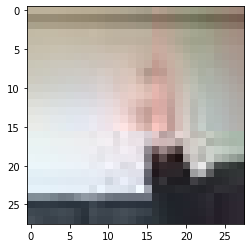

예측확률분포: [0.65411156 0.16295952 0.18292889]
라벨: 1, 예측결과: 0


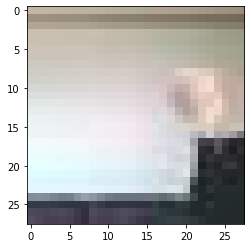

예측확률분포: [9.9883205e-01 5.5898557e-04 6.0888828e-04]
라벨: 1, 예측결과: 0


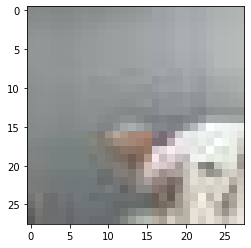

예측확률분포: [0.7192676  0.00330906 0.27742332]
라벨: 2, 예측결과: 0


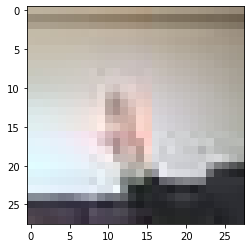

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 추출 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 랜덤하게 5개 추출
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

<br><br>

이것만 가지고 문제의 원인을 정확히 파악하기는 어렵겠다. 일단 몇 번 더 시도를 해봐야겠다는 생각이 든다. 정확도 41.9%는 label이 고작 3개 뿐인 걸 감안하면 정말 낮은 수치다. 

뭔가 문제가 있는 건 분명하다.


ㅡ


<br><br>

####**[ 2차 시도 ]**

<br>

세부조정이 의미가 없다고 판단될 정도로 정확도가 극히 낮다는 것은 기본적인 데이터 자체의 문제를 의심하게 한다. 1차 시도 이미지의 2배(약 1500개 → 3000개) 가량을 확보하여 정확도를 향상시키기로 한다.

<br><br>

**기초 데이터 보완**

In [ ]:

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_r = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/rock'
resize_images(image_path_r)

image_path_p = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/paper'
resize_images(image_path_p)

image_path_s = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/scissor'
resize_images(image_path_s)

1011  images to be resized.
1011  images resized.
1011  images to be resized.
1011  images resized.
1011  images to be resized.
1011  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=3033):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3033 입니다.
x_train shape: (3033, 28, 28, 3)
y_train shape: (3033,)


<br><br>

**딥러닝 네트워크 설계**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))    # RGB Channel
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    # 최종 분류기의 Class수(3개: 가위(0),바위(1),보(2))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 64)        

<br><br>

**딥러닝 네트워크 학습**


In [ ]:
print(x_train.shape)
print(y_train.shape)

(3033, 28, 28, 3)
(3033,)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
95/95 [==============================] - 4s 34ms/step - loss: 1.8833 - accuracy: 0.4497
Epoch 2/30
95/95 [==============================] - 3s 34ms/step - loss: 0.7761 - accuracy: 0.6314
Epoch 3/30
95/95 [==============================] - 3s 33ms/step - loss: 0.6207 - accuracy: 0.7181
Epoch 4/30
95/95 [==============================] - 3s 33ms/step - loss: 0.4316 - accuracy: 0.8210
Epoch 5/30
95/95 [==============================] - 3s 34ms/step - loss: 0.3804 - accuracy: 0.8434
Epoch 6/30
95/95 [==============================] - 3s 33ms/step - loss: 0.2660 - accuracy: 0.9001
Epoch 7/30
95/95 [==============================] - 3s 33ms/step - loss: 0.2270 - accuracy: 0.9097
Epoch 8/30
95/95 [==============================] - 3s 33ms/step - loss: 0.1746 - accuracy: 0.9288
Epoch 9/30
95/95 [==============================] - 3s 33ms/step - loss: 0.2059 - accuracy: 0.9235
Epoch 10/30
95/95 [==============================] - 3s 33ms/step - loss: 0.1504 - accuracy: 0.9463
Epoch 11/

<br><br>

**테스트 실시**

1차 시도와 동일한 테스트셋으로 테스트한다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.4290 - accuracy: 0.4633 - 109ms/epoch - 11ms/step
test_loss: 4.429043769836426 
test_accuracy: 0.4633333384990692


<br>

2차 시도의 정확도는 **46.3%**다. 1차 시도(41.9%)에 비해 개선 되었다고 보기 어렵다.

데이터 3000개도 부족한가? 


ㅡ


<br><br>

####**[ 3차 시도 ]**

<br>

쉽게 생각했나보다. 그래, 사진으로 가위바위보를 구분하는 게 얼마나 어려운 일인데 고작 3천장은 안되지. 데이터를 극단적으로 늘려보자. 일단 50% 후반대 정확도만 나오면 그때는 Model 조정으로 쉽게 해결할 수 있을거야. 

이미지를 다시 2배 이상 증가시키기로 한다.


<br><br>

**데이터 셋팅 보완**

In [ ]:

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_r = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/rock'
resize_images(image_path_r)

image_path_p = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/paper'
resize_images(image_path_p)

image_path_s = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/scissor'
resize_images(image_path_s)

2259  images to be resized.
2259  images resized.
2259  images to be resized.
2259  images resized.
2259  images to be resized.
2259  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=6777):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6777 입니다.
x_train shape: (6777, 28, 28, 3)
y_train shape: (6777,)


<br><br>

**딥러닝 네트워크 설계**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))    # RGB Channel
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    # 최종 분류기의 Class수(3개: 가위(0),바위(1),보(2))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

<br><br>

**딥러닝 네트워크 학습**


In [ ]:
print(x_train.shape)
print(y_train.shape)

(6777, 28, 28, 3)
(6777,)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
212/212 [==============================] - 13s 4ms/step - loss: 1.2065 - accuracy: 0.5076
Epoch 2/30
212/212 [==============================] - 1s 3ms/step - loss: 0.6675 - accuracy: 0.6972
Epoch 3/30
212/212 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.7734
Epoch 4/30
212/212 [==============================] - 1s 4ms/step - loss: 0.4232 - accuracy: 0.8243
Epoch 5/30
212/212 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8558
Epoch 6/30
212/212 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.8882
Epoch 7/30
212/212 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.9118
Epoch 8/30
212/212 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.9125
Epoch 9/30
212/212 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9245
Epoch 10/30
212/212 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.948

<br><br>

**테스트 실시**

1,2차 시도와 동일한 테스트셋으로 테스트한다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.8817 - accuracy: 0.4267 - 237ms/epoch - 24ms/step
test_loss: 4.881689071655273 
test_accuracy: 0.4266666769981384


<br>

3차 시도의 정확도가 무려 **42.7%**이 나왔다......... 세상에.

심지어 2차 시도(46.3%)에 비해 더 떨어졌다. 6천장이 넘는 데이터를 모아서 학습시켰는데 아무것도 나아지지 않았다. 

<br><br>



---



<br><br>

###**2) *등대를 찾아서* ㅡ**

<br>

문제의 원인을 너무 단순하게 생각했던 것 같다. 정확도가 극히 낮기 때문에 데이터 부족이 절대적인 이유일 거라고 넘겨 짚었고, 데이터만 압도적으로 늘리면 1차적으로는 유의미한 결과가 나오리라 생각했다. 

이미 판단이 흐려졌다는 게 분명한 이상, 내부적으로 원인을 탐색하기에 앞서 Case study로 시야를 넓힐 필요가 있겠다. 잘 분석된 사례를 통해 문제를 파악하고 앞으로 나아갈 방향을 살펴보자.



<br>

####**[ 4차 시도 ]**

<br>

가위바위보 분류와 관련된 정보를 검색하는 과정에서 tensorflow가 제공하는 해당 Dataset이 있다는 것을 알게 되었다. rock_paper_scissors dataset은 가위바위보 손동작 이미지와 각 이미지에 해당하는 ClassLabel정보를 제공하며 총 2892개의 instance를 포함한다.

'2) 등대를 찾아서ㅡ' 파트에서는 tensorflow 제공 Dataset을 활용한 시도를 수행한다. 단, Exploration에서 주어진 조건은 이미지를 직접 생성하여 문제를 해결하는 것이므로 이번 시도는 Insight를 얻기 위한 절차로만 활용하고자 한다.

이번 파트의 구현에는 azzurri21님의 [Velog](https://velog.io/@azzurri21/%EB%94%A5%EB%9F%AC%EB%8B%9D-CNN%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-rockpaperscissors-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EC%84%9D)를 참고하였다. 이해가 되지 않는 코딩이 일부 존재하나, Case study의 일환으로 진행한 부분임을 다시 한 번 밝힌다.

기본적인 사항은 참고자료를 토대로 구현하되, 이미지 사이즈는 100x100으로 제시되어 있는 부분을 1,2,3차 시도와 동일하게 28x28로 변경적용하였다. 이미지 사이즈가 달라진 영향으로 Model 구성의 일부를 변경한 것 이외에는 수정한 내용이 없다.

<br><br>

**CASE STUDY ⎟ Tensorflow - Rock Paper Scissors Dataset**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow.keras as keras

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    # shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteRRQIK5/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteRRQIK5/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
# print(ds_info)
image_shape = ds_info.features['image'].shape
image_dtype = ds_info.features['image'].dtype

print(f'image shape: {image_shape}')
print(f'image dtype: {image_dtype}')

image shape: (300, 300, 3)
image dtype: <dtype: 'uint8'>


In [ ]:
# print(ds_train)
num_train = ds_info.splits['train'].num_examples
print(f'num of train: {num_train}')

# print(ds_test)
num_test = ds_info.splits['test'].num_examples
print(f'num of test : {num_test}')

num of train: 2520
num of test : 372


In [ ]:
CLASS_NUM = ds_info.features['label'].num_classes # = 3
CLASS_NAMES = ['rock', 'paper', 'scissors']

print(f'num of class: {CLASS_NUM}\n')

for i in range(CLASS_NUM):
    print(i, CLASS_NAMES[i])

num of class: 3

0 rock
1 paper
2 scissors


<br>

이미지를 확인해보자.

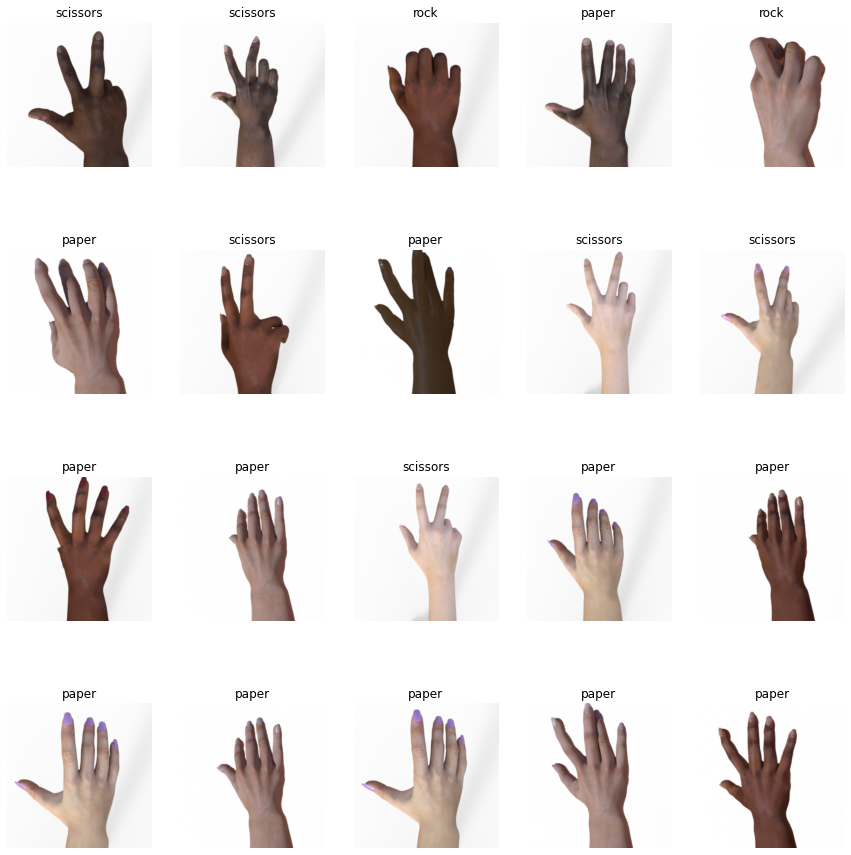

In [ ]:
plt.figure(figsize=(15, 16))

i = 1
for image, label in ds_train.take(20):
    plt.subplot(4, 5, i)
    i += 1
    plt.axis('Off')
    label = CLASS_NAMES[label.numpy()]
    plt.title(f'{label}')
    plt.imshow(image)

In [ ]:
# test set의 첫 번째 데이터를 변수에 저장
for image, label in ds_test.take(1):
    test_image0 = image.numpy()
    test_label0 = label.numpy()

**데이터 전처리**

이미지 사이즈를 28*28로 변환하여 적용하였다.

In [ ]:
INPUT_IMG_SIZE = 28

def normalize_img(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [ ]:
# Hyper Parameter Configuration
BATCH_SIZE = 32

In [ ]:
ds_train = ds_train.map(normalize_img,
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(num_train)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize_img,
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

**모델 구성**



In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                              input_shape=(INPUT_IMG_SIZE, INPUT_IMG_SIZE, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(CLASS_NUM, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  13


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

**Compiling & fitting**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Hyper Parameter Configuration
EPOCHS = 30

In [ ]:
history = model.fit(ds_train, epochs=EPOCHS, validation_data = ds_test)

Epoch 1/30
79/79 [==============================] - 16s 15ms/step - loss: 1.0993 - accuracy: 0.3266 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/30
79/79 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.3361 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 3/30
79/79 [==============================] - 0s 4ms/step - loss: 1.0990 - accuracy: 0.3349 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/30
79/79 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.3341 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/30
79/79 [==============================] - 0s 4ms/step - loss: 1.0989 - accuracy: 0.3254 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 6/30
79/79 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.3107 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/30
79/79 [==============================] - 0s 4ms/step - loss: 1.0989 - accuracy: 0.3349 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 8/30
79/79 [

**성능 평가**

In [ ]:
test_loss, test_acc = model.evaluate(ds_test, verbose=2)

print(f'\n테스트 정확도: {test_acc*100:.2f}%')

12/12 - 0s - loss: 1.0986 - accuracy: 0.3333 - 82ms/epoch - 7ms/step

테스트 정확도: 33.33%


<br>

??????

정확도가 **33.3%** 나왔다. 분명 똑같이 구현했고, 참고한 블로그에서는 정확도 **94.4%**를 기록했다. 그런데 직접 구현했을 경우 나온 정확도는 고작 33.3%다. label이 3개이니 이건 그냥 찍어도 맞출 수 있는 확률이다.

혹시 앞선 1,2,3차 시도와 동일하게 **이미지 사이즈를 28x28로 축소변경한 것이 원인**이 아닐까 하는 생각이 들었다. 참고 블로그에서는 100x100을 적용했으니 약 1/4로 축소한 셈이다. 어쩌면 문제는 이미지의 수량보다도 **이미지 해상도**였는지 모르겠다. 

<br><br>

ㅡ

<br><br>

####**[ 5차 시도 ]**

<br>

아직 분명한 것은 아니지만 주요한 단서를 찾은 듯하다. 명확한 비교를 위해 4차 시도와 동일하게 Tensorflow - Rock Paper Scissors Dataset을 활용하여 재시도 하되, **이미지 사이즈를 28x28에서 100x100으로 변경**하겠다.


<br><br>

**CASE STUDY ⎟ Tensorflow - Rock Paper Scissors Dataset** (Image Resizing, 100x100)

<br>

4차 시도와 동일한 부분은 생략하고, 변경된 부분 위주로 기재하였다.

<br>

**데이터 전처리**

이미지 사이즈를 100*100으로 적용한다.

In [ ]:
INPUT_IMG_SIZE = 100

def normalize_img(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [ ]:
# Hyper Parameter Configuration
BATCH_SIZE = 32

In [ ]:
ds_train = ds_train.map(normalize_img,
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(num_train)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize_img,
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

**모델 구성**



In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                              input_shape=(INPUT_IMG_SIZE, INPUT_IMG_SIZE, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(CLASS_NUM, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  15


**Compiling & fitting**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Hyper Parameter Configuration
EPOCHS = 30

In [ ]:
history = model.fit(ds_train, epochs=EPOCHS, validation_data = ds_test)

Epoch 1/30
79/79 [==============================] - 16s 22ms/step - loss: 0.8704 - accuracy: 0.5496 - val_loss: 0.5460 - val_accuracy: 0.7688
Epoch 2/30
79/79 [==============================] - 1s 11ms/step - loss: 0.1656 - accuracy: 0.9397 - val_loss: 0.3276 - val_accuracy: 0.8925
Epoch 3/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.2184 - val_accuracy: 0.9382
Epoch 4/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.1285 - val_accuracy: 0.9651
Epoch 5/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 0.5867 - val_accuracy: 0.8575
Epoch 6/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.4712 - val_accuracy: 0.8548
Epoch 7/30
79/79 [==============================] - 1s 11ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.1364 - val_accuracy: 0.9516
Epoch 8/30
7

**평가**

In [ ]:
test_loss, test_acc = model.evaluate(ds_test, verbose=2)

print(f'\n테스트 정확도: {test_acc*100:.2f}%')

12/12 - 0s - loss: 0.1086 - accuracy: 0.9516 - 76ms/epoch - 6ms/step

테스트 정확도: 95.16%


<br>

예상대로 정확도가 **95.2%**로 높아졌다.

이미지 크기를 축소하여 해상도가 낮아질 경우, 원본 이미지에 비해 식별이 어렵고 이는 학습 및 예측에 부정적인 영향을 미칠 수도 있겠다는 생각이 들었다. 이 부분을 가설로 세우고 이를 증명할 수 있는 시도를 수행해보자.


<br><br>

---



<br><br>

###**3) *새로운 맘으로 다시 시작해* ㅡ**

<br>


<br><br>

####**[ 6차 시도 ]**

<br>

기존 1,2,3차 시도까지는 이미지 사이즈를 28*28로 축소하여 학습 및 테스트를 실시하였다. 이후 4,5차 시도를 통해 이미지 리사이즈에 따른 해상도 저하가 모델 성능에 영향을 줄 가능성이 있음을 확인했다. 모델의 성능을 개선하고 예측 정확도를 높이기 위해 필요하다고 생각되는 바는 다음과 같다.


<br>

>**가 설 (a)**
*   이미지 사이즈 축소는 데이터 학습 및 테스트의 성능과 관련이 있다.
*   이미지 사이즈를 기존(28*28)보다 확대조정할 경우 예측 정확도를 향상시킬 수 있을 것이다.



<br>

**데이터 셋팅 보완**

28*28로 축소하였던 이미지 전처리 과정을 수정하려고 한다. 기존의 사이즈 변경과정에서 본래 이미지 디렉토리 상에 리사이즈된 형태의 이미지를 덮어서 저장하는 방식으로 설정했었다. 이렇게 될 줄 모르고 구글 드라이브 상에 모든 사진을 모으고 로컬 상의 원본은 이미 삭제한 상태다. 축소한 이미지를 다시 확대하는 것은 의미가 없으므로 이미지 모으기부터 반복한다. 원점부터 다시 시작이다.

한장, 한장 이미지를 다시 모으고 가지런히 정리했다. 이번엔 100*100으로 이미지 사이즈를 설정한다. 기존 이미지 사이즈에 비해 약 3.7배 확대된 크기다. 저장방식은 동일하게 하되 이전의 과오를 반복하지 않기 위해 로컬 상의 원본도 잘 보관해두었다. 하하.. 

In [ ]:
''' 이미지 사이즈 변경 '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 100x100 사이즈로 바꾸어 저장
	target_size=(100,100)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_r = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/new_r'
resize_images(image_path_r)

image_path_p = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/new_p'
resize_images(image_path_p)

image_path_s = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/new_s'
resize_images(image_path_s)

2371  images to be resized.
2371  images resized.
2371  images to be resized.
2371  images resized.
2391  images to be resized.
2391  images resized.


In [ ]:
def size_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " 개수")
 
image_path_r = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/new_r'
size_images(image_path_r)

image_path_p = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/new_p'
size_images(image_path_p)

image_path_s = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/new_s'
size_images(image_path_s)

2371  개수
2371  개수
2391  개수


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=7133):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/new_s/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/new_r/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/new_p/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 7133 입니다.
x_train shape: (7133, 100, 100, 3)
y_train shape: (7133,)


<br><br> 

7천 장을 넘게 모았다. 

이미지를 확인해보면 아래에서와 같이 해상도가 훨씬 높아졌다는 것을 알 수 있다. 

- 라벨:  0


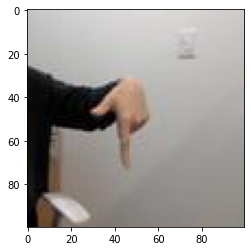

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[200])
print('- 라벨: ', y_train[200])

- 라벨:  1


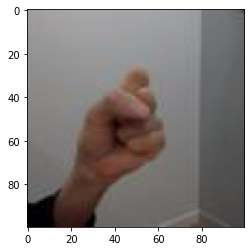

In [ ]:
plt.imshow(x_train[3000])
print('- 라벨: ', y_train[3000])

- 라벨:  2


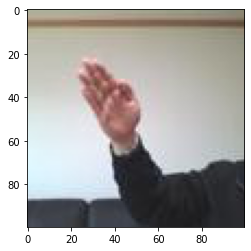

In [ ]:
plt.imshow(x_train[6000])
print('- 라벨: ', y_train[6000])

<br><br>

**딥러닝 네트워크 설계**

이미지 사이즈는 변경 적용하였으나 기초적인 부분은 기존의 Baseline을 유지하여 이미지 사이즈 변경의 영향을 확인하고자 하였다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))    # 100*100 사이즈로 변경적용
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    # 최종 분류기의 Class수(3개: 가위(0),바위(1),보(2))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)      

<br><br>

**딥러닝 네트워크 학습**


In [ ]:
print(x_train.shape)
print(y_train.shape)

(7133, 100, 100, 3)
(7133,)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
223/223 [==============================] - 2s 7ms/step - loss: 2.1736 - accuracy: 0.6372
Epoch 2/10
223/223 [==============================] - 1s 7ms/step - loss: 0.3418 - accuracy: 0.8657
Epoch 3/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1935 - accuracy: 0.9286
Epoch 4/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1248 - accuracy: 0.9560
Epoch 5/10
223/223 [==============================] - 1s 7ms/step - loss: 0.0802 - accuracy: 0.9717
Epoch 6/10
223/223 [==============================] - 1s 6ms/step - loss: 0.1318 - accuracy: 0.9551
Epoch 7/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0381 - accuracy: 0.9892
Epoch 8/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0239 - accuracy: 0.9920
Epoch 9/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0615 - accuracy: 0.9811
Epoch 10/10
223/223 [==============================] - 1s 6ms/step - loss: 0.0718 - accuracy: 0.9774

**테스트셋 구성**

테스트데이터의 사이즈도 변경해야 하기 때문에 새롭게 준비했다.

단, 학습 데이터와는 전혀 다른 이미지를 셋팅한 것은 동일하다. 전혀 다른 사람에 의해 새롭게 촬영된 이미지로만 구성되었다.

In [ ]:
''' 이미지 사이즈 변경 '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 동일하게 100x100 사이즈로 변경적용
	target_size=(100,100)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_rr = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/val/rock'
resize_images(image_path_rr)

image_path_pp = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/val/paper'
resize_images(image_path_pp)

image_path_ss = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/val/scissor'
resize_images(image_path_ss)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # number_of_data=가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_tast)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/val'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_tast)의 이미지 개수는 300 입니다.
x_test shape: (300, 100, 100, 3)
y_test shape: (300,)


<br><br>

**테스트 실시**

이미지도 새롭게 셋팅하고, 리사이징 과정도 변경한 뒤 시도하는 첫 테스트다. 얼마나 좋은 성능을 보여줄지 기대된다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.5889 - accuracy: 0.4367 - 54ms/epoch - 5ms/step
test_loss: 1.5888960361480713 
test_accuracy: 0.43666666746139526


<br>

정확도가 **43.7%**다. 이게 대체 무슨 일이람. 

할 말을 잃게 만든다. 대체 뭘 못 맞춘건지 확인이라도 해보자. 

<br><br>

**예측 세부내용**

예측확률분포: [0.78097695 0.04918592 0.16983718]
라벨: 2, 예측결과: 0


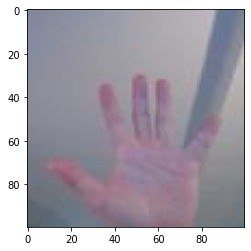

예측확률분포: [0.82881504 0.10154817 0.06963673]
라벨: 1, 예측결과: 0


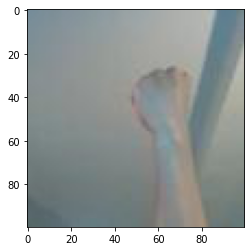

예측확률분포: [0.56903136 0.01538356 0.41558504]
라벨: 1, 예측결과: 0


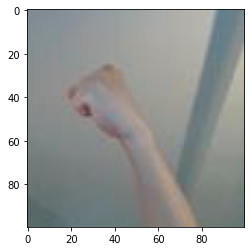

In [ ]:
import matplotlib.pyplot as plt
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 취합
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 3개 추출
samples = random.choices(population=wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

저렇게 쉬운 걸 못맞췄다. 이 정도면 더이상 데이터 자체의 문제는 아닐 거라는 생각이 든다. 막막하다.  




<br>

ㅡ



<br><br>

####**[ 7차 시도 ]**

<br>

이쯤되니 포기하고 싶은 마음도 들지만 기왕 여기까지 온 거 이것저것 인자들을 조정이라도 해보자. 아직 본격적으로 네트워크를 새롭게 구현하거나, 파라미터를 변경한 적은 없으니 한 번 시도해 보도록 한다.



<br>

>**가 설 (b)**
*   Deep learning model의 Layer 구성은 모델의 성능과 관련이 있다.
*   compile 상의 최적화 알고리즘 및 손실함수가 모델의 성능과 관련이 있다.
*   적정 epoch가 예측 정확도와 관련이 있다.

<br>

이번 시도에서는 Model의 Layer 수를 늘리거나 하이퍼파라미터를 조정하여 그 변화를 살펴보았다. 또한 compile 과정의 optimizers를 변경하고 다양한 loss function을 적용해보기도 했다. 각각의 시도마다 epoch도 변경하면서 loss값 및 정확도가 어떻게 달라지는지도 확인하였다.

**Complie 살펴보기**

compile에는 크게 세 가지가 필요하다. optimizer, loss, metrics이다.

*    **Optimizer** : 학습의 최적화 방식 결정, 최적화 알고리즘
*    **Loss** : 모델이 학습해나가야 할 방향 결정, 오차를 줄여나가기 위한 척도
*    **Metrics** : 모델의 성능을 평가하는 척도, 정확도(accuracy), 정밀도(precision), 재현율(recall) 등

<BR>

optimizer에는 Adam 외에 SGD, RMSprop 등을 적용해보고, loss 역시 mean_squared_error, logcosh 등 다양한 함수를 설정해보았다. 

예측 정확도를 더 저하시키는 경우는 있었으나, 안타깝게도 개선된 경우는 없었다.

<br><br>

학습률에 비해 테스트셋에 대한 정확도가 너무나 낮게 측정되는 것을 보아 과적합 문제를 해소할 수 있는 시도도 해보았다.

다음은 Model 구현 상에서 Layer에 변화를 주고 **Dropout을 적용**한 시도이다.

In [ ]:
''' Model Re-design '''
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))    
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))    # Layer 추가
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))    # 과적합 방지 Dropout 적용
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))    # 과적합 방지 Dropout 적용
model.add(keras.layers.Dense(3, activation='softmax'))    

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  13


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

<br><br>

그리고 이 Model의 적용은 아래에서 확인할 수 있듯이, 정확도를 35.7%까지 하락시키는 결과를 낳았다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.8082 - accuracy: 0.3567 - 173ms/epoch - 17ms/step
test_loss: 1.8081929683685303 
test_accuracy: 0.3566666543483734


<br>







---


<br><br>

###**4) *나도 여기까지 올 줄은 몰랐어* ㅡ**

<br>




<br>

####**[ 8차 시도 ]**

<br>

절망스러운 마음을 애써 추스르고 처음부터 끝까지 코드를 꼼꼼히 살펴보았다. 다량의 이미지 처리에 치중하느라 놓치고 지나 간 것은 없는지 다시 한 번 확인했다. 8차 시도까지 진행하면서 오히려 눈에 익어 발견하지 못했던 부분들이 있었다.

<br>

첫째로, 정규화를 실시해놓고 정작 정규화 결과를 담은 변수 대신 이전의 변수를 계속 적용하고 있었다. 결국 정규화하지 않은 채로 학습 및 테스트가 실시된 셈이다. 

두번째로, Train-Validation-Test set으로 Split하는 과정을 생략한 채 모든 시도가 진행되었다. 1차 시도에서 기본적인 셋팅을 마친 이후에 추가할 계획이었으나, 첫 번째 정확도가 예상보다 낮게 나오면서 간과하고 있던 부분이었다.

이 부분들을 수정∙보완하여 8차 시도를 실시한다. 



<br>

>**가 설 (c)**
*   Data의 정규화를 통해 모델의 성능을 향상시킬 수 있을 것이다.
*   Train-Validation-Test으로 Split하여 실시할 경우 효율적 학습이 가능할 것이다.

<br><br>

**Dataset Split**

Train : Validation : Test 를 8 : 1 : 1로 나누고 고른 분배를 위해 shuffle을 실시하였다. Random seed는 72를 적용한다.

In [ ]:
def train_val_test_split(ds, ds_size, sd,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

x_train_new, x_val_new, x_test_new = train_val_test_split(x_train, 7133, 72)    # 임의값 72 설정
y_train_new, y_val_new, y_test_new = train_val_test_split(y_train, 7133, 72)

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)

print(x_val_new.shape)
print(y_val_new.shape)

print(x_test_new.shape)
print(y_test_new.shape)

(5706, 100, 100, 3)
(5706,)
(713, 100, 100, 3)
(713,)
(714, 100, 100, 3)
(714,)


<br>

Label에 맞추어 잘 분할되었는지 이미지를 확인해보자.

- 라벨:  2


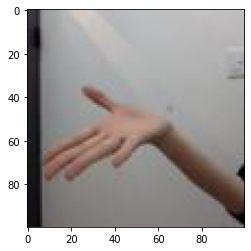

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_new[100])
print('- 라벨: ', y_train_new[100])

- 라벨:  1


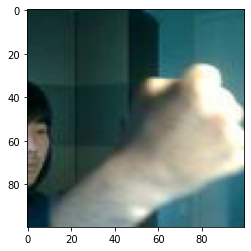

In [ ]:
plt.imshow(x_train_new[3000])
print('- 라벨: ', y_train_new[3000])

- 라벨:  0


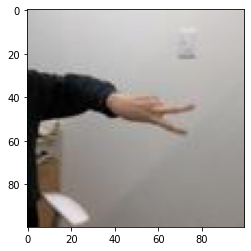

In [ ]:
plt.imshow(x_train_new[4000])
print('- 라벨: ', y_train_new[4000])

<br><br>

**딥러닝 네트워크 설계**

Layer의 구성 및 파라미터는 **'7차 시도'** 중 가장 적정하다고 판단되는 값을 기준으로 설정하였다. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))    
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.4))    # 과적합 방지 Dropout 적용
model.add(keras.layers.Dense(3, activation='softmax'))    

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 32)                5

<br><br>


Model의 구조를 도식화하여 살펴보자.

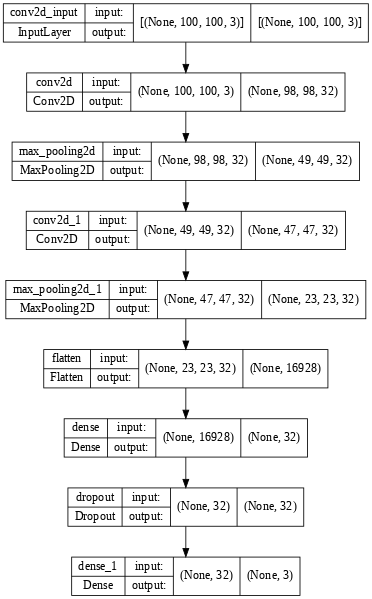

In [3]:
keras.utils.plot_model(model, show_shapes=True, dpi = 60)

<br><br>

**정규화 실시**

RGB 구성범위(0-255)를 정규화(0-1)하는 과정을 거쳤다.  

In [ ]:
x_train_new_norm = x_train_new / 255
x_val_new_norm = x_val_new / 255
x_test_new_norm = x_test_new / 255

<br><br>

**딥러닝 네트워크 학습**

최적화를 위한 optimizer는 **Adam**을 사용하고, 손실함수는 **Sparse cross entropy**을 적용하였다. 

**epoch는 17**로 설정했다. 이 역시 '7차 시도'의 경험에 의한 값이다.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_new_norm, y_train_new, epochs=17)

Epoch 1/17
179/179 [==============================] - 12s 6ms/step - loss: 0.8397 - accuracy: 0.5871
Epoch 2/17
179/179 [==============================] - 1s 6ms/step - loss: 0.4317 - accuracy: 0.8235
Epoch 3/17
179/179 [==============================] - 1s 6ms/step - loss: 0.2830 - accuracy: 0.8906
Epoch 4/17
179/179 [==============================] - 1s 6ms/step - loss: 0.1844 - accuracy: 0.9320
Epoch 5/17
179/179 [==============================] - 1s 6ms/step - loss: 0.1497 - accuracy: 0.9457
Epoch 6/17
179/179 [==============================] - 1s 6ms/step - loss: 0.0989 - accuracy: 0.9648
Epoch 7/17
179/179 [==============================] - 1s 6ms/step - loss: 0.0924 - accuracy: 0.9667
Epoch 8/17
179/179 [==============================] - 1s 6ms/step - loss: 0.0714 - accuracy: 0.9737
Epoch 9/17
179/179 [==============================] - 1s 6ms/step - loss: 0.0654 - accuracy: 0.9737
Epoch 10/17
179/179 [==============================] - 1s 6ms/step - loss: 0.0651 - accuracy: 0.973

<br><br>

**검증(validation) 실시**

검증(validation) 데이터셋을 활용하여 학습이 적절하게 이루어졌는지 확인한다.

아래 보는 것과 같이 98.9%로 적정성능을 나타냈다. 설렌다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_val_new_norm, y_val_new, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

23/23 - 0s - loss: 0.0520 - accuracy: 0.9888 - 219ms/epoch - 10ms/step
test_loss: 0.05200088396668434 
test_accuracy: 0.9887797832489014


<br><br>

**테스트 실시**

이제 Test set을 확인할 차례다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_new_norm, y_test_new, verbose = 2)

print("최종 test_loss : {}".format(test_loss))
print("최종 test_accuracy : {}".format(test_accuracy))

23/23 - 0s - loss: 0.0512 - accuracy: 0.9874 - 101ms/epoch - 4ms/step
최종 test_loss : 0.0512356199324131
최종 test_accuracy : 0.9873949289321899


<br>

예측 정확도 **98.7%**를 달성했다. 감격스럽다. 수차례 고생한 보람이 있구나 싶다.

<br>

그런데 마냥 기뻐하기에는 석연치 않은 구석이 있다.

위의 결과는 전체 데이터셋을 **Train-Validation-Test로 구분한 Test set의 데이터를 토대로 예측을 실시**한 결과다. 해당 Test set이 학습이나 검증 단계에 직접 사용되지는 않지만, **동일한 촬영자에 의해 유사한 환경에서 생성된 이미지 다량이 Train 및 Validation set 안에 포함**되었을 수 밖에 없고, 이에 대한 학습이 이루어졌을 것이다. 결국 학습한 적이 있는 사진과 매우 유사한 이미지에 대한 테스트 결과인 셈이다. 따라서 **이 결과는 신뢰도를 갖기 어렵다고 판단된다.**


다만, 그러한 측면을 감안하더라도 Model이 기본적인 성능은 갖추었다고 판단되므로, 제대로 된 데이터를 가지고 다시 한 번 테스트 해보자.


<br><br><br>

✪ **<u>생경한 Test data로 예측하기</u>** ✪

<br>


지금까지 **단 한 번도 사용된 적 없고, 처음 등장하는 배경과 손을 촬영한 이미지를 Test dataset**으로 만든다. 

이미지는 label 당 각 100장 씩, 총 300장이다. Test data도 리사이징 과정을 거쳤으며, 정규화를 실시한다.

**테스트셋 구성**

In [ ]:
''' 이미지 사이즈 변경 '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 동일하게 100x100 사이즈로 변경적용
	target_size=(100,100)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_rr = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/test/n_t_rock'
resize_images(image_path_rr)

image_path_pp = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/test/n_t_paper'
resize_images(image_path_pp)

image_path_ss = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/test/n_t_scissor'
resize_images(image_path_ss)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # number_of_data=가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/n_t_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/n_t_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/n_t_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_tast)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/new/test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_tast)의 이미지 개수는 300 입니다.
x_test shape: (300, 100, 100, 3)
y_test shape: (300,)


<br>

**테스트 실시**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.6810 - accuracy: 0.6067 - 62ms/epoch - 6ms/step
test_loss: 2.68095326423645 
test_accuracy: 0.6066666841506958


<br>

**정확도 60.7% !!!!!!!!**  ⭐

목표치인 60% 이상의 정확도를 달성했다. 드디어 해냈다!! 이 결과를 보고 진짜 울컥했다. 

물론 Hyper parameter나 epoch 값을 조금만 변경하면 떨어질 수도 있는 턱걸이 수치지만, 내내 40% 전후만 기록하며 저조한 성능을 보이다가 이 정도 개선되었다는 것만으로도 감격스러웠다. **생경한 이미지의 테스트 셋을 활용하여 얻어낸 결과**라는 점이 무엇보다 자랑스럽다. 이번 Exploration은 소모적인 과정만 반복하다가 끝날까봐 걱정했는데 마침내 개선된 결과를 확인할 수 있어서 다행이다. 

<br><br>

**예측 세부내용 확인**

예측의 결과를 자세히 살펴보자. 

In [ ]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=44  #44번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9972004e-01 2.7978967e-04 1.4750074e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [1.4342611e-01 8.5656565e-01 8.1200269e-06]
라벨: 0, 예측결과: 1


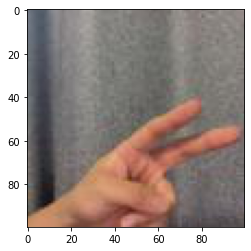

예측확률분포: [9.9464840e-01 4.8190077e-06 5.3466880e-03]
라벨: 2, 예측결과: 0


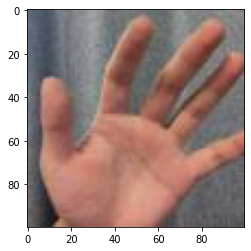

예측확률분포: [9.9854517e-01 1.4459596e-03 8.9825344e-06]
라벨: 1, 예측결과: 0


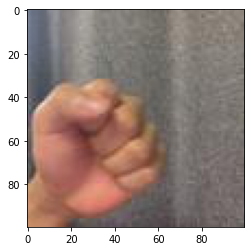

In [ ]:
import matplotlib.pyplot as plt
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 취합
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 3개 추출
samples = random.choices(population=wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

위의 이미지는 예측에 실패한 내역이다. 

왜 못맞추었는지 납득이 가지는 않지만, 이래서 60% 수준에 머물렀겠구나 싶다. 40% 가량은 틀렸다는 말이니까. 

한편으로는 성능개선의 여지가 충분하다는 생각도 든다.


<br><br><br><br><br><br>



---




##**3. 종합 분석 및 검토**

<br><br>

###**1) 회차별 결과 종합**

<br>

총 8차에 걸쳐 테스트를 시도하였고, 최종적으로 예측 정확도 60.7%에 도달하였다.


| - ||SUMMARY|TOTAL INPUT DATA|SHAPE|MODEL LAYERS|TOTAL PARAMETERS|OUTPUT CLASS|TEST ACCURACY(%)| note |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1차 시도 || Baseline setting & Basic test | 1533 | 28, 28, 3 | 9 | 32,995 | 3 | 41.9 |  | 
| 2차 시도 || 데이터 수량 증가 | 3033 | 28, 28, 3 | 9 | 32,995 | 3 | 46.3 |  | 
| 3차 시도 || 데이터 수량 증가 | 6777 | 28, 28, 3 | 9 | 32,995 | 3 | 42.7 |  | 
| 4차 시도 || (Case study) Baseline setting | 2520 | 28, 28, 3 | 13 | 72,707 | 3 | (33.3) | Tensorflow Dataset | 
| 5차 시도 || (Case study) 이미지 사이즈 조절 | 2520 | 100, 100, 3 | 15 | 371,779 | 3 | (95.2) | Tensorflow Dataset | 
| 6차 시도 || 이미지데이터 재구성 및 사이즈 조절 | 7133 | 100, 100, 3 | 9 | 438,499 | 3 | 43.7 |  | 
| 7차 시도 || 다양한 모델구성 및 하이퍼파라미터 변경 적용 | 7133 | 100, 100, 3 | 13 | 564,227 | 3 | 35.7 |  | 
| 8차 시도 || 데이터 정규화 및 Train-Validation-Test set 구분 | 7133 | 100, 100, 3 | 8 | 551,971 | 3 | 60.7 | split set 이외의 별도 이미지(미학습본)로 평가 | 


<br><br><br>

###**2) 주요 가설 재검증**

<br>

설정한 가설에 따라 변인을 조작해가며 총 8회에 걸친 테스트를 실시했다. 각각의 시도마다 테스트 결과를 검증 및 평가하였으나, 예상한 바와 다르게 결과가 도출되었을 때 변인의 영향을 제대로 분석하고 넘어가지는 못했다. 또한 다음 시도에 있어서 전 회차에서 조정한 사항이 그대로 누적되어 적용되는 부분도 있었기에 원인과 결과 간의 관계를 명확하게 파악하기는 어렵다. 시도 자체가 체계를 갖추어 이뤄지지 않았으므로 근본적인 한계를 벗어나는 것은 불가능하겠으나, 몇 가지 주요 가설에 대해서는 직접적인 비교분석을 실시하여 어떠한 변인이 결과에 영향을 주었는지 재확인하고자 한다.

재검증은 '8차 시도'의 셋팅을 기본으로, 검증하고자 하는 변인 조정에 따른 결과를 비교하였다.

<br>

####**[ 이미지 사이즈 축소와 성능 간의 관계 ]**

<br>

'6차 시도'에서 Case study의 시사점을 반영하여 이미지 사이즈 축소는 데이터 학습 및 테스트의 성능과 관련이 있다는 접근으로, 이미지 사이즈를 기존(28*28)보다 확대조정할 경우 예측 정확도를 향상시킬 수 있을 것이라는 가설을 세웠다.

이에 따라 이미지 사이즈를 100*100으로 조정하여 테스트를 수행하였으나 예측 정확도가 향상되지는 않았었다. 이후 '8차 시도'에서 동일하게 이미지 사이즈를 확대조정한 데이터를 적용하여 성능을 개선하였으나, 이때에는 다른 변인(정규화 등)도 조정이 있었기에 무엇이 직접적으로 영향을 미쳤는지 파악하기 어렵다. 

'8차 시도'와 다른 요건은 동일하게 통제하되 이미지 사이즈만 다시 28*28로 축소 적용하여 결과에 변화가 있는지 확인한다.

페이지 관계 상 별도의 파일에서 실행하고, 변경이 있었던 주요한 코드만 불러왔다.  

In [ ]:
''' 이미지 사이즈 재변경(28*28) '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_r = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/re_r'
resize_images(image_path_r)

image_path_p = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/re_p'
resize_images(image_path_p)

image_path_s = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/re_s'
resize_images(image_path_s)

2371  images to be resized.
2371  images resized.
2371  images to be resized.
2371  images resized.
2391  images to be resized.
2391  images resized.


<br>

이미지 사이즈를 28*28로 바꾸어 적용한 내용이다. 해상도가 크게 낮아졌음을 알 수 있다.

- 라벨:  0


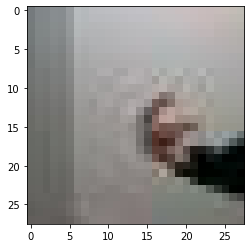

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[100])
print('- 라벨: ', y_train[100])

- 라벨:  1


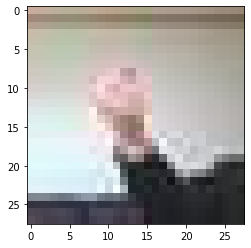

In [ ]:
plt.imshow(x_train[3000])
print('- 라벨: ', y_train[3000])

- 라벨:  2


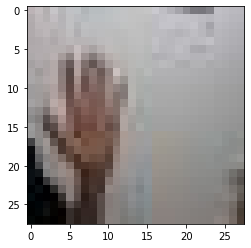

In [ ]:
plt.imshow(x_train[5500])
print('- 라벨: ', y_train[5500])

<br>

모델은 입력 값의 데이터 형태만 변경(28, 28, 3)하고, 모두 동일하게 구성했다. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))    
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.4))    # 과적합 방지 Dropout 적용
model.add(keras.layers.Dense(3, activation='softmax'))    

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

<br>

테스트 이미지의 사이즈도 28*28로 변경하여 저장한다.

In [ ]:
''' 이미지 사이즈 변경 '''
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 동일하게 28x28 사이즈로 변경적용
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_path_rr = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/test/re_rock'
resize_images(image_path_rr)

image_path_pp = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/test/re_paper'
resize_images(image_path_pp)

image_path_ss = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/test/re_scissor'
resize_images(image_path_ss)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # number_of_data=가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/re_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/re_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/re_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_tast)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/data/LSMdata/rock_scissor_paper/resize/test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_tast)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


<br>

 테스트 결과, 정확도가 **기존 60.7%에서 43.0%로 하락**했다. 이미지 해상도에 따라 예측 정확도에 큰 차이가 있음을 알 수 있다. 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.9852 - accuracy: 0.4300 - 43ms/epoch - 4ms/step
test_loss: 1.985203504562378 
test_accuracy: 0.4300000071525574


<br><br>

####**[ 정규화 여부에 따른 성능 비교 ]**

<br>

정규화가 예측의 정확도를 높일 것이라는 가설을 세우고, '8차 시도'에서 데이터를 정규화한 변수로 학습 및 예측을 실시하였다.(그 전 시도에서도 정규화를 시켰었으나, 변수 지정 상의 착오로 해당 값이 적용되지 않았음) 어느 정도의 차이가 나는지 직접 살펴보았다.

페이지 관계 상 결과만 수록한다.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_new, y_train_new, epochs=17)

Epoch 1/17
179/179 [==============================] - 13s 7ms/step - loss: 5.8507 - accuracy: 0.4816
Epoch 2/17
179/179 [==============================] - 1s 6ms/step - loss: 0.5156 - accuracy: 0.7722
Epoch 3/17
179/179 [==============================] - 1s 7ms/step - loss: 0.3213 - accuracy: 0.8670
Epoch 4/17
179/179 [==============================] - 1s 6ms/step - loss: 0.2327 - accuracy: 0.9045
Epoch 5/17
179/179 [==============================] - 1s 6ms/step - loss: 0.2685 - accuracy: 0.8852
Epoch 6/17
179/179 [==============================] - 1s 6ms/step - loss: 0.1744 - accuracy: 0.9345
Epoch 7/17
179/179 [==============================] - 1s 6ms/step - loss: 0.1863 - accuracy: 0.9232
Epoch 8/17
179/179 [==============================] - 1s 6ms/step - loss: 0.1330 - accuracy: 0.9457
Epoch 9/17
179/179 [==============================] - 1s 7ms/step - loss: 0.1419 - accuracy: 0.9434
Epoch 10/17
179/179 [==============================] - 1s 6ms/step - loss: 0.1078 - accuracy: 0.959

<br>

정규화를 거치지 않은 채 학습을 실시하였으며, 아래는 Split set을 활용하여 검증(validation) 및 Test를 실시한 결과다. 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_val_new, y_val_new, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

23/23 - 0s - loss: 0.1630 - accuracy: 0.9734 - 268ms/epoch - 12ms/step
test_loss: 0.16300398111343384 
test_accuracy: 0.9733520150184631


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose = 2)

print("최종 test_loss : {}".format(test_loss))
print("최종 test_accuracy : {}".format(test_accuracy))

23/23 - 0s - loss: 0.0467 - accuracy: 0.9860 - 98ms/epoch - 4ms/step
최종 test_loss : 0.04674617201089859
최종 test_accuracy : 0.9859943985939026


<br><br>

학습된 자료와는 무관한 별도의 테스트 데이터셋 역시 정규화를 생략했다.

다음은 정규화를 시키지 않은 **예측 정확도 결과값**이다. 정확도가 **기존 60.7%에서 28.3%로 하락**했다.



In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.4466 - accuracy: 0.2833 - 67ms/epoch - 7ms/step
test_loss: 3.4466466903686523 
test_accuracy: 0.28333333134651184


<br><br><br>

####**[ 새로운 Model 적용 및 성능 비교 ]**

<br>

Model의 구성 및 Parameter의 차이가 예측 정확도에 영향을 줄 것이라는 가설을 세우고, '7차 시도'에서 다양한 변화를 주었다. 기본적인 성능은 도달한 상태의 셋팅을 기반으로 Model 변경이 결과에 어떠한 영향을 주는지 검증한다.

새롭게 적용할 Model은 **ResNet**이다.



**ResNet**

*    몇 개의 layer를 건너뛰는 Skip Connection 계층을 포함한 모델
*    앞선 layer의 output 일부가 layer를 몇 층 건너뛴 다음 layer의 input에 추가되는 개념
*    깊은 신경망층을 구성함에도 Skip Connection을 활용하여 Vanishing Gradient 문제를 해결

<br>

이 Model의 구현에는 정강민 님께서 공유해주신 [colab 자료](https://colab.research.google.com/drive/184CqvDy5UwIIzSx9Y_uaY6rg_6bgVZdf?usp=sharing)를 참고하였다. 

데이터셋 구성 등은 '8차 시도'와 동일하게 진행하고, Model에 해당하는 부분만 새롭게 적용한 내용이다.


In [ ]:
import glob
import random 
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Image as display

SEED = 42 
random.seed(SEED) 
tf.random.set_seed(SEED) 
np.random.seed(SEED)
AUTOTUNE = tf.data.AUTOTUNE

In [7]:
base_model = keras.applications.ResNet101(
    weights='imagenet',
    input_shape=(100, 100, 3),
    include_top=False)

171458560/171446536 [==============================] - 3s 0us/step


In [8]:
# freeze

base_model.trainable = False

In [9]:
inputs = keras.Input(shape=(100, 100, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.4)(x)
outputs = keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_____________________________________________

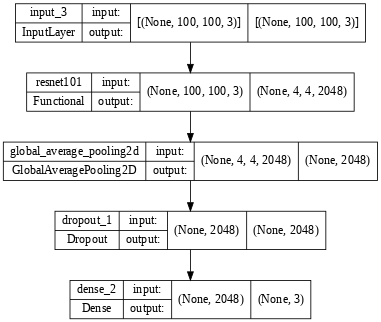

In [11]:
keras.utils.plot_model(model, show_shapes=True, dpi = 60)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_new_norm, y_train_new, epochs=100)

Epoch 1/100
179/179 [==============================] - 20s 37ms/step - loss: 1.1554 - accuracy: 0.3517
Epoch 2/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0909 - accuracy: 0.3927
Epoch 3/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0536 - accuracy: 0.4318
Epoch 4/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0361 - accuracy: 0.4485
Epoch 5/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0180 - accuracy: 0.4700
Epoch 6/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0178 - accuracy: 0.4697
Epoch 7/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0140 - accuracy: 0.4814
Epoch 8/100
179/179 [==============================] - 7s 37ms/step - loss: 1.0023 - accuracy: 0.4867
Epoch 9/100
179/179 [==============================] - 7s 37ms/step - loss: 0.9856 - accuracy: 0.5039
Epoch 10/100
179/179 [==============================] - 7s 37ms/step - loss: 0.98

In [ ]:
# unfreeze

base_model.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5),  # learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_new_norm, y_train_new, epochs=17)

Epoch 1/17
179/179 [==============================] - 32s 117ms/step - loss: 1.2262 - accuracy: 0.3838
Epoch 2/17
179/179 [==============================] - 21s 117ms/step - loss: 1.0483 - accuracy: 0.4285
Epoch 3/17
179/179 [==============================] - 21s 116ms/step - loss: 0.9770 - accuracy: 0.4865
Epoch 4/17
179/179 [==============================] - 21s 117ms/step - loss: 0.8775 - accuracy: 0.5666
Epoch 5/17
179/179 [==============================] - 21s 117ms/step - loss: 0.8070 - accuracy: 0.6155
Epoch 6/17
179/179 [==============================] - 21s 117ms/step - loss: 0.6577 - accuracy: 0.7052
Epoch 7/17
179/179 [==============================] - 21s 117ms/step - loss: 0.5547 - accuracy: 0.7655
Epoch 8/17
179/179 [==============================] - 21s 117ms/step - loss: 0.4925 - accuracy: 0.7925
Epoch 9/17
179/179 [==============================] - 21s 117ms/step - loss: 0.3392 - accuracy: 0.8561
Epoch 10/17
179/179 [==============================] - 21s 117ms/step - l

<br>

**ResNet Model**(unfreeze weights)에 대한 예측 결과는 다음과 같다.

**정확도가 기존 60.7%에서 65.7%로 상승**했다. 65%가 대단한 예측률은 아니지만 모든 시도를 통틀어서 가장 높은 정확도를 보였다. Model의 변화로 예측의 수준을 높일 수 있음을 확인했다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.8420 - accuracy: 0.6567 - 450ms/epoch - 45ms/step
test_loss: 1.8419620990753174 
test_accuracy: 0.6566666960716248


-

<br><br><br><br><br><br>




---

# **III. 결 론**

<br>

이번 Exploration에서는 CNN을 활용하여 가위바위보 사진을 분류하는 모델을 구현하고 테스트하는 과정을 수행했다. 총 8회에 걸쳐 예측 정확도를 높이기 위한 시도를 실시 하였으며, 60.7%의 성능을 달성했다.
추가적으로 ResNet Model 적용을 통해서 정확도를 **65.7%**까지 향상시켰다. 

일련의 과정을 통해 유효하다고 판단한 변인은 다음과 같다.

<br>

*   **이미지의 해상도에 따라 학습 및 예측의 성능에 차이가 있다.**
*   **정규화 과정 여부에 따라 학습 및 예측의 성능에 차이가 있다.**
*   **적정 Model의 적용으로 정확도를 높일 수 있다.**


<br><br>

####**[ 맺음말 ]**

<br>

**❍ 이미지 처리에 과도한 시간 소요**

다량의 이미지를 생성하고, 불러와서, 전처리하는 과정에서 소요되는 시간이 너무 길고 번거로웠다. 이미지가 소량일 때는 무관하던 문제와 처음 마주하기도 했다. 이 단계에서 낭비한 시간이 예상보다 너무 길어서 본질적인 물음에 답을 찾을 시간이 극히 부족했던 Exploration 이었다.  

구글 드라이브 마운트를 기반으로 colab을 사용하는 것이 이미지 처리의 어려움을 가중시키기도 했다. 수천 장의 이미지를 업로드 하는 과정 자체가 소모적이었고, 실제 업로드 한 이미지와 불러와지는 이미지 갯수가 상이함에도 원인을 알 수 없는 상황도 있었다. 로컬 상의 데이터를 직접 컨트롤하기에 용이한 대안적 수단을 익혀야 겠다는 생각이 절실했다. 또한 대량의 이미지 파일변환(PNG→JPGE)을 시도하는 과정에서 Linux 숙련도가 필요함을 다시 한 번 느꼈다.

<br>

**❍ 초기에 정확한 분석을 간과하여 유효하지 않은 시도들이 늘어남**

1차 시도에서 정확도가 41.9%로 나왔을 때, 보다 객관적인 방법으로 원인을 파악했어야 한다는 생각이 든다. 데이터 수량부족이 문제라고 섣불리 판단함에 따라 불필요한 시도들이 늘어났다. 연구 진행과정 상에서 초기 방향설정의 중요함을 느꼈다. 

<br>

**❍ Case Study를 통한 시사점 도출**

문제의 원인을 파악하지 못하고, 방향설정에 어려움을 겪을 때 Case Study를 실시한 것이 도움이 됐다. 이번에는 Tensorflow 에서 제공하는 Rock-Paper-Scissors Dataset을 활용하여 Study를 진행했다. 참고한 사례의 초기 셋팅이나 Baseline 구성 등이 달라서 본 시도에 그대로 적용할 수는 없더라도 시사점을 얻기에 충분했다. 특히 이미지 전처리 방식에 변화가 필요하다는 생각전환의 계기가 되었다. 또한 Library를 더 다양하게 익히는 경험이었다.

<br>

**❍ 무조건 복잡하고 깊은 망(Network)을 설계한다고 성능이 좋아지는 것은 아님**

Model 구현 시 Layer를 다양하게 쌓고, Parameter를 조정하여 학습 및 예측에 미치는 변화가 어떠한지 살펴보았다. 그 과정에서 복잡하고 깊은 망을 설계할 경우, 어려운 내용도 더 잘 학습할 것이라고 기대했지만 오히려 학습률이나 정확도가 떨어지는 상황을 경험했다. 이번 분류에서는 8 Layers 정도로 모델을 구성하는 것이 가장 효과가 좋았다. Epoch 또한 20을 넘지 않는 수준이 적정하다고 판단했다. 다만, 이는 경험에 의해 찾아낸 값으로, 향후 EarlyStopping 이나 ModelCheckpoint 등 보다 객관적인 방법도 적용해 볼 필요가 있다.

<br>

**❍ 다양한 딥러닝 모델 경험의 중요성**

본 시도과정에서는 초기에 설정한 Baseline을 토대로 Model의 Layer를 몇 겹 더 쌓거나 Hyper parameter를 조정하는데 그쳤었다. 이에 따른 예측 정확도의 차이는 매우 미미한 수준이었다. 이후 Skip connection을 가진 Resnet 등을 알게 되었고, 새로운 시도를 해볼 수 있었다. 이를 통해 기존 시도(8차시도 기준)에 비해 정확도를 60.7%에서 65.7%까지 높일 수 있었다.

앞으로도 다양한 딥러닝 모델을 이해하고, 이를 실제로 구현하는 방법을 숙지함으로써 효과적인 문제해결에 이를 수 있겠다는 생각이 들었다. 또한 단순히 정확도를 비교하는 것 이상으로 모델 간의 차이를 분석하는 수단도 함께 익혀야 겠다.

<br>




            
<br><br><br>



---

<br>

< 참고자료 >

- LMS, Fundamental 15. 딥러닝 레이어의 이해(1) Linear, Convolution [1]
- LMS. Fundamental 17. 거울아 거울아 나는 멍멍이 상이니 아니면 냥이 상이니?
- 위키백과, Keras, https://ko.wikipedia.org/wiki/%EC%BC%80%EB%9D%BC%EC%8A%A4 [2]
- https://velog.io/@minjung-s/Optimization-Algorithm
- https://bskyvision.com/822
- https://velog.io/@azzurri21/%EB%94%A5%EB%9F%AC%EB%8B%9D-CNN%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-rockpaperscissors-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EC%84%9D
- https://ai-rtistic.com/2021/07/21/toy-project-rock-scissors-paper/#attempt---2
- https://colab.research.google.com/drive/184CqvDy5UwIIzSx9Y_uaY6rg_6bgVZdf?usp=sharing

<br><br>

---

